In [35]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") 
pd.options.mode.chained_assignment = None

In [2]:
#get the NIFTY Stock code
df = web.DataReader('SBIN.NS', data_source='yahoo',start='2000-01-01', end='2020-06-30')
print(df.shape)
df

(5062, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,22.988899,22.101999,22.267099,22.988899,25152894.0,1.090844
2000-01-04,24.720200,22.535999,22.988899,24.446600,47648561.0,1.160014
2000-01-05,24.975000,23.116301,23.493700,23.441799,36396207.0,1.112335
2000-01-06,25.286400,23.776699,23.776699,24.625900,70573968.0,1.168522
2000-01-07,26.409100,24.059799,24.673100,25.786400,83453217.0,1.223588
...,...,...,...,...,...,...
2020-06-25,186.800003,180.399994,182.199997,185.250000,73620385.0,185.250000
2020-06-26,188.600006,183.800003,188.000000,184.600006,49176958.0,184.600006
2020-06-29,183.100006,178.500000,183.000000,179.250000,50966428.0,179.250000


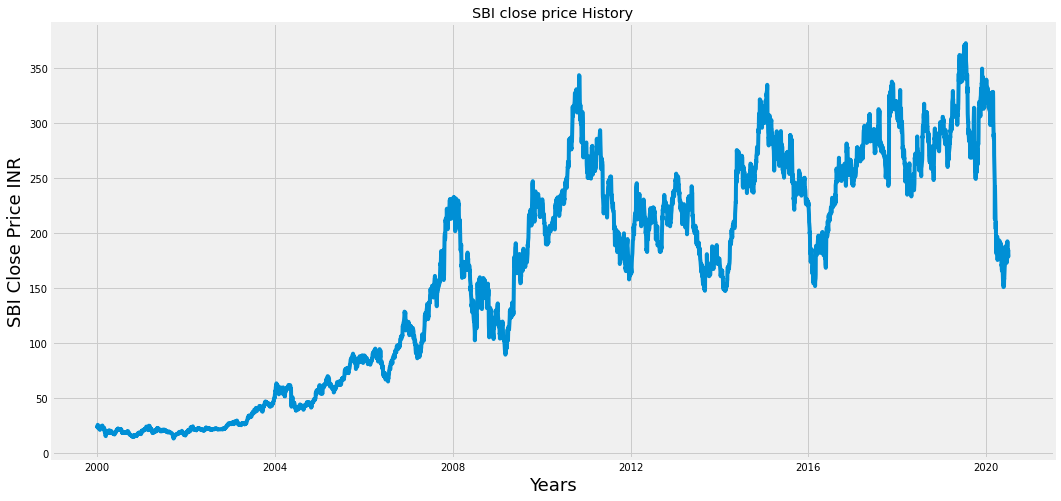

In [3]:
plt.figure(figsize=(16,8))
plt.title("SBI close price History")
plt.plot(df['Close'])
plt.xlabel('Years',fontsize=18)
plt.ylabel('SBI Close Price INR',fontsize=18)
plt.show()

In [4]:
#Filter data with only 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to numpy array
dataset = data.values

#get the no of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

4050

In [5]:
# Scale the data
scalar = MinMaxScaler(feature_range=(0,1))

scaled_data = scalar.fit_transform(dataset)

scaled_data

array([[0.02685613],
       [0.03091597],
       [0.0281175 ],
       ...,
       [0.46205849],
       [0.4598304 ],
       [0.47751579]])

In [6]:
#Create the training dataset
train_data = scaled_data[0:training_data_len, :]

In [7]:
#Split the data in x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()



[array([0.02685613, 0.03091597, 0.0281175 , 0.03141534, 0.03464744,
       0.03364899, 0.02798605, 0.02714523, 0.0270795 , 0.02568667,
       0.02481967, 0.02496394, 0.02693496, 0.02529258, 0.02522685,
       0.02282248, 0.02191593, 0.02330848, 0.0281306 , 0.02713214,
       0.02760505, 0.02786768, 0.03083716, 0.03007515, 0.0278415 ,
       0.02650131, 0.02731595, 0.02820941, 0.02855115, 0.03288699,
       0.0295496 , 0.02852469, 0.02852469, 0.02618604, 0.02700068,
       0.02513494, 0.02433339, 0.02677732, 0.02615958, 0.02732905,
       0.02294057, 0.02489849, 0.02221812, 0.01754054, 0.01856546,
       0.01735673, 0.01313897, 0.00984114, 0.00760749, 0.00601776,
       0.00947323, 0.01183834, 0.0153069 , 0.01877574, 0.01856546,
       0.01549099, 0.01466326, 0.01357262, 0.01547762, 0.0147418 ])]
[0.015517171295547874]

[array([0.02685613, 0.03091597, 0.0281175 , 0.03141534, 0.03464744,
       0.03364899, 0.02798605, 0.02714523, 0.0270795 , 0.02568667,
       0.02481967, 0.02496394, 0.0

In [8]:
#Convert the x_train & y_train to numpy arrays

x_train, y_train = np.array(x_train),np.array(y_train)

In [9]:
#Reshape the data
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(3990, 60)
(3990, 60, 1)


In [11]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
3990/3990 [==============================] - 12s 3ms/step - loss: 7.2972e-04
Epoch 2/100
3990/3990 [==============================] - 12s 3ms/step - loss: 5.5012e-04
Epoch 3/100
3990/3990 [==============================] - 12s 3ms/step - loss: 5.2721e-04
Epoch 4/100
3990/3990 [==============================] - 12s 3ms/step - loss: 5.0434e-04
Epoch 5/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.9150e-04
Epoch 6/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.7165e-04
Epoch 7/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.5333e-04
Epoch 8/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.3012e-04
Epoch 9/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.0846e-04
Epoch 10/100
3990/3990 [==============================] - 12s 3ms/step - loss: 3.9909e-04
Epoch 11/100
3990/3990 [==============================] - 12s 3ms/step - loss: 4.1601e-04
Epoch 12/100
3990/3

In [18]:
#Create the testing data set
#create a new array containing sclaed value from index 3990 to 5062
test_data = scaled_data[training_data_len - 60:, :]

#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [19]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Get the models predicted prie values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [23]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.05714212952866385

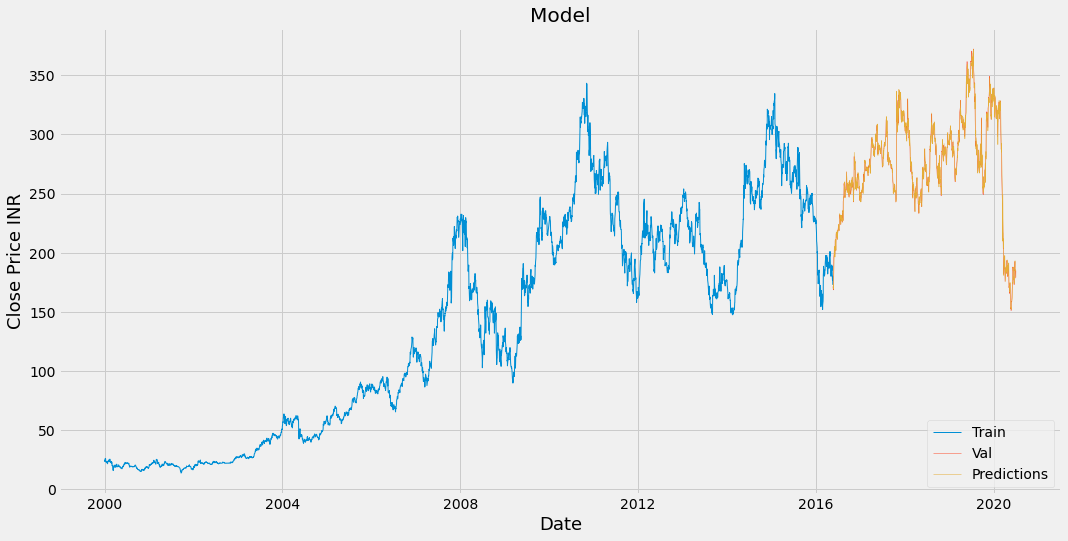

In [47]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Close'],linewidth=1)
plt.plot(valid[['Close','Predictions']],linewidth=.5)
plt.legend(['Train','Val','Predictions'], loc='lower right',)

#leg = plt.legend()
# get the individual lines inside legend and set line width
#for line in leg.get_lines():
  #line.set_linewidth(1)
plt.show()


In [48]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-05-20,171.350006,173.522064
2016-05-23,168.399994,172.234055
2016-05-24,169.500000,169.190018
2016-05-25,175.100006,170.290665
2016-05-26,184.149994,175.785400
...,...,...
2020-06-25,185.250000,184.656235
2020-06-26,184.600006,185.468475
2020-06-29,179.250000,184.779099
